# Photography


In [1]:
from IPython.display import display

def Vega(spec):
    bundle = {}
    bundle['application/vnd.vega.v5+json'] = spec
    display(bundle, raw=True)

def treemap(clusters, cluster_name):
    
  clusters_json = [{"id": index+1, "name": "%s (%s)" % (x["value"], x["count"]), "parent": '0', "value": x["count"]} for index, x in enumerate(clusters)]
  clusters_json.insert(0, {"id": 0, "value": 0, "name": cluster_name})
    
  Vega({
  "$schema": "https://vega.github.io/schema/vega/v5.json",
  "description": "An example of treemap layout for hierarchical data.",
  "width": 1200,
  "height": 800,
  "padding": 2.5,
  "autosize": "none",
  "data": [
    {
      "name": "tree",
      "values": clusters_json,
      "transform": [
        {
          "type": "stratify",
          "key": "id",
          "parentKey": "parent"
        },
        {
          "type": "treemap",
          "field": "value",
          "sort": {"field": "value", "order": "descending"},
          "round": True,
          "size": [{"signal": "width"}, {"signal": "height"}]
        }
      ]
    },
    {
      "name": "nodes",
      "source": "tree",
      "transform": [{ "type": "filter", "expr": "datum.children" }]
    },
    {
      "name": "leaves",
      "source": "tree",
      "transform": [{ "type": "filter", "expr": "datum.parent == 0" }]
    }
  ],

  "scales": [
    {
      "name": "color",
      "type": "ordinal",
      "domain": {"data": "nodes", "field": "name"},
      "range": [
        "#3182bd", "#6baed6", "#9ecae1", "#c6dbef", "#e6550d",
        "#fd8d3c", "#fdae6b", "#fdd0a2", "#31a354", "#74c476",
        "#a1d99b", "#c7e9c0", "#756bb1", "#9e9ac8", "#bcbddc",
        "#dadaeb", "#636363", "#969696", "#bdbdbd", "#d9d9d9"
      ]
    },
    {
      "name": "size",
      "type": "ordinal",
      "domain": [0, 1, 2, 3],
      "range": [256, 10, 20, 14]
    },
    {
      "name": "opacity",
      "type": "ordinal",
      "domain": [0, 1, 2, 3],
      "range": [0.15, 0.5, 0.8, 1.0]
    }
  ],

  "marks": [
    {
      "type": "rect",
      "from": {"data": "nodes"},
      "interactive": False,
      "encode": {
        "enter": {
          "fill": {"scale": "color", "field": "name"}
        },
        "update": {
          "x": {"field": "x0"},
          "y": {"field": "y0"},
          "x2": {"field": "x1"},
          "y2": {"field": "y1"}
        }
      }
    },
    {
      "type": "rect",
      "from": {"data": "leaves"},
      "encode": {
        "enter": {
          "stroke": {"value": "#fff"}
        },
        "update": {
          "x": {"field": "x0"},
          "y": {"field": "y0"},
          "x2": {"field": "x1"},
          "y2": {"field": "y1"},
          "fill": {"value": "transparent"},
          "href": {"value": "https://collections.vam.ac.uk/"}
        },
        "hover": {
          "fill": {"value": "green"}
        }
      }
    },
    {
      "type": "text",
      "from": {"data": "leaves"},
      "interactive": False,
      "encode": {
        "enter": {
          "font": {"value": "Helvetica Neue, Arial"},
          "align": {"value": "center"},
          "baseline": {"value": "middle"},
          "fill": {"value": "#000"},
          "text": {"field": "name"},
          "fontSize": {"scale": "size", "field": "depth"},
          "fillOpacity": {"scale": "opacity", "field": "depth"}
        },
        "update": {
          "x": {"signal": "0.5 * (datum.x0 + datum.x1)"},
          "y": {"signal": "0.5 * (datum.y0 + datum.y1)"}
        }
      }
    }
  ]
}
)

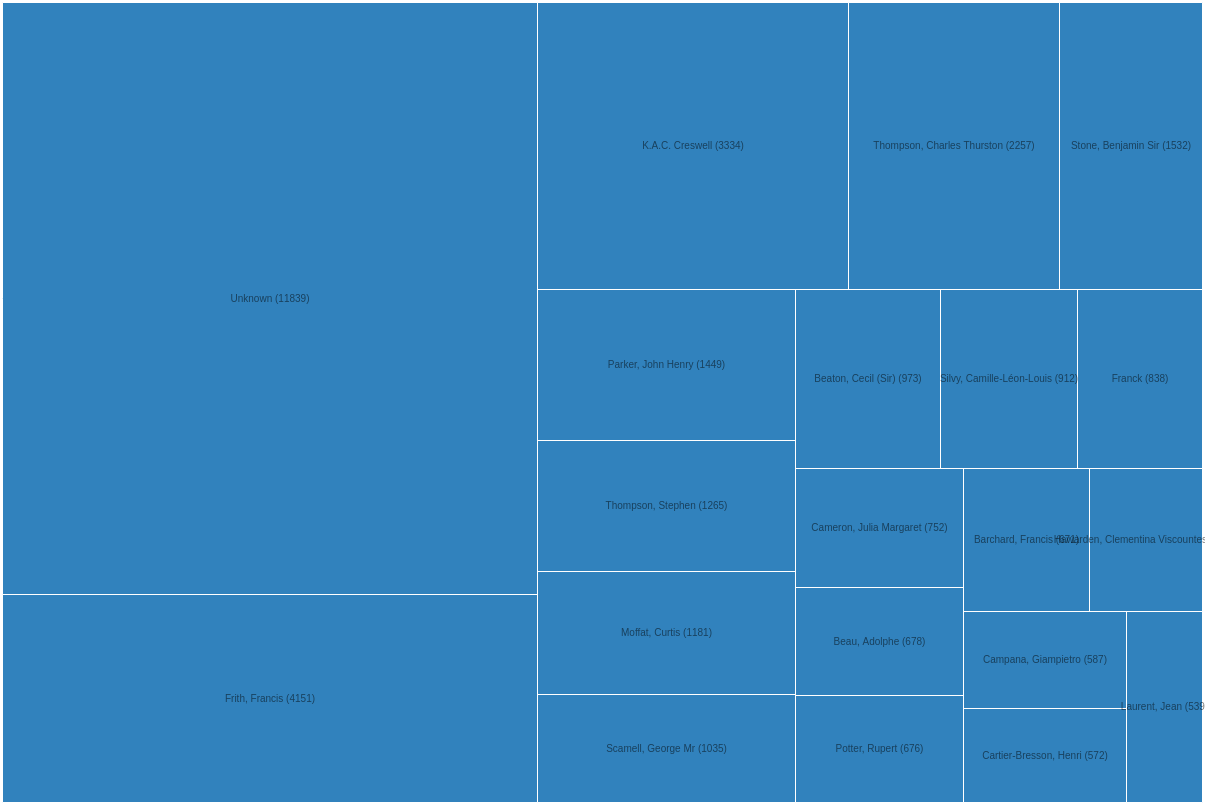

In [4]:
import requests
req = requests.get('https://api.vam.ac.uk/v2/objects/clusters//search?kw_object_type=Photograph')
object_clusters = req.json()
persons = object_clusters["terms"]
treemap(persons, "Person")

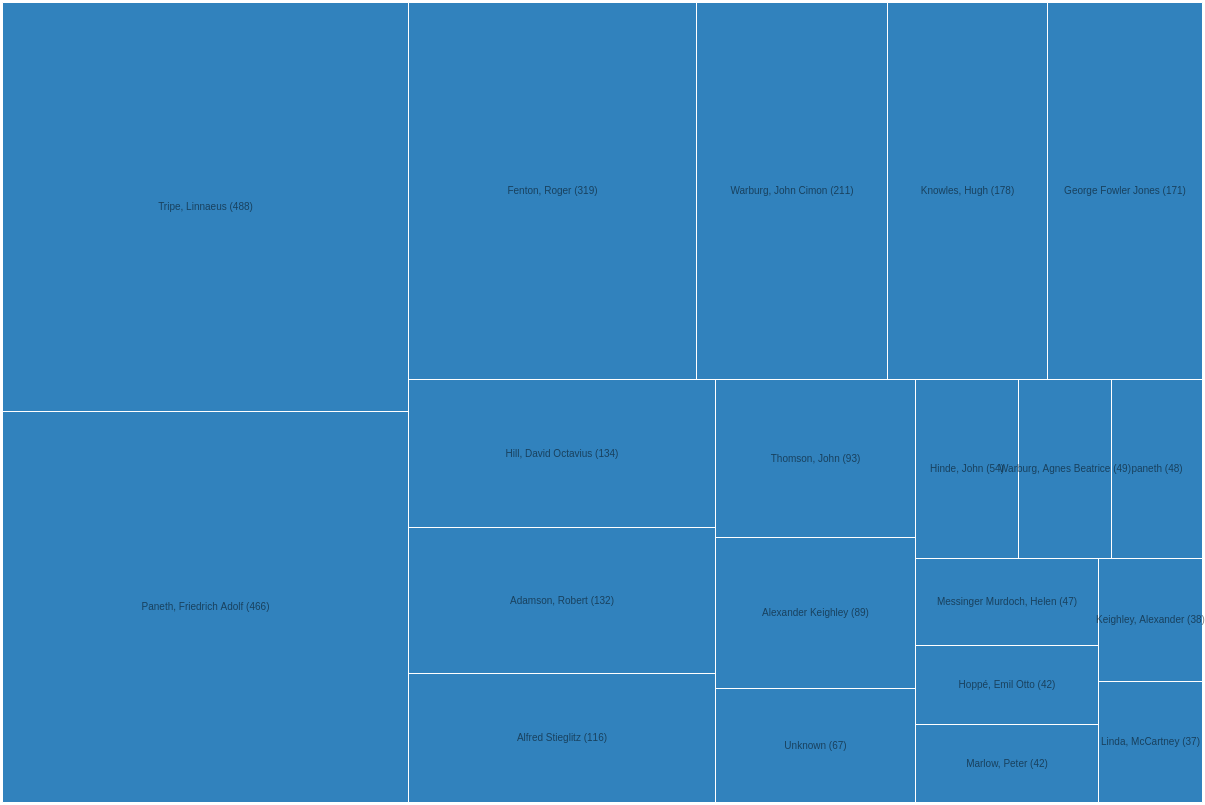

In [5]:
import requests
req = requests.get('https://api.vam.ac.uk/v2/objects/clusters/person/search?kw_object_type=Photographs')
object_clusters = req.json()
persons = object_clusters["terms"]
treemap(persons, "Person")

In [26]:
import requests
import pandas as pd
import json
req = requests.get('https://api.vam.ac.uk/v2/objects/clusters/person/search?kw_object_type=Photograph&cluster_size=50')
object_clusters = req.json()
df_photographs = pd.read_json(json.dumps(object_clusters["terms"]), orient='records')
df_photographs

,id,value,count,count_max_error
0,A1848,Unknown,11839,0
1,A6403,"Frith, Francis",4151,0
2,AUTH334543,K.A.C. Creswell,3334,0
3,N3687,"Thompson, Charles Thurston",2257,0
4,A4801,"Stone, Benjamin Sir",1532,0
5,AUTH325233,"Parker, John Henry",1449,0
6,AUTH335751,"Thompson, Stephen",1265,0
7,A12876,"Moffat, Curtis",1181,0
8,A4798,"Scamell, George Mr",1035,0
9,A5902,"Beaton, Cecil (Sir)",973,0


In [25]:
import requests
import pandas as pd
import json
req = requests.get('https://api.vam.ac.uk/v2/objects/clusters/person/search?kw_object_type=photographs&cluster_size=50')
object_clusters = req.json()
df_photographs = pd.read_json(json.dumps(object_clusters["terms"]), orient='records')
df_photographs

,id,value,count,count_max_error
0,A6257,"Tripe, Linnaeus",488,0
1,AUTH341944,"Paneth, Friedrich Adolf",466,0
2,A7250,"Fenton, Roger",319,0
3,AUTH342257,"Warburg, John Cimon",211,0
4,AUTH360428,"Knowles, Hugh",178,0
5,AUTH346805,George Fowler Jones,171,0
6,N4882,"Hill, David Octavius",134,0
7,A11654,"Adamson, Robert",132,0
8,A1097,Alfred Stieglitz,116,0
9,A8914,"Thomson, John",93,0
